In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-12-16 05:23:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.5MB/s    in 8.3s    

2022-12-16 05:24:03 (19.3 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
def extract(file_location):
  import zipfile
  zip_ref=zipfile.ZipFile(file_location)
  zip_ref.extractall()
  zip_ref.close()

In [3]:
extract("10_food_classes_10_percent.zip")

In [4]:
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [5]:
import os
import numpy as np
label_class=(np.array(os.listdir(train_dir)))
label_class.sort()
print(label_class)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
import tensorflow as tf

train_data_10p=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                   image_size=(300,300),
                                                                   #label_mode="categorical"
                                                                   )
test_data_10p=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                   image_size=(300,300),
                                                                   )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10p

<BatchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [8]:
for images,labels in train_data_10p.take(1):
  print(images,labels)

tf.Tensor(
[[[[4.70666695e+00 5.70666695e+00 7.06666708e-01]
   [6.79160023e+00 7.79160023e+00 2.79159999e+00]
   [5.72000027e+00 6.72000027e+00 1.72000003e+00]
   ...
   [4.85986481e+01 4.40873337e+01 3.49993668e+01]
   [3.55799751e+01 3.65915794e+01 4.21800003e+01]
   [1.71126614e+01 2.15954628e+01 4.12270660e+01]]

  [[4.70666695e+00 5.70666695e+00 7.06666708e-01]
   [5.90520000e+00 6.90520000e+00 1.90520012e+00]
   [4.42000008e+00 5.42000008e+00 4.19999957e-01]
   ...
   [5.79479790e+01 5.67726555e+01 6.01120262e+01]
   [4.33807716e+01 4.68807793e+01 6.40459976e+01]
   [3.03417320e+01 3.66800003e+01 6.50568008e+01]]

  [[6.10666656e+00 7.10666656e+00 2.10666633e+00]
   [8.08199978e+00 9.08199978e+00 4.08199978e+00]
   [8.33666611e+00 9.33666611e+00 4.33666611e+00]
   ...
   [7.13666382e+01 7.54033127e+01 9.52733307e+01]
   [4.95499573e+01 5.81699638e+01 8.94499817e+01]
   [2.89486637e+01 3.95366631e+01 7.88180008e+01]]

  ...

  [[2.81886063e+01 1.91886063e+01 1.01886063e+01]
   [2

#**Helper functions**

In [9]:
def checkpoint_callback(file_name):
  checkpoint_dir="checkpoint_callback/models/"
  checkpoint_path=checkpoint_dir+file_name
  checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                          save_weights=True,
                                                          verbose=0,
                                                          )
  return checkpoint_callback

In [10]:
def tensorboard_callback(dir_name, exp_name):
  dir_log= dir_name+"/"+exp_name
  tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=dir_log)
  print("saving Tensorboard files to:", dir_log)
  return tensorboard_callback

#**Model_0**-10% train data

In [11]:
base=tf.keras.applications.EfficientNetB0(include_top=False)
base.trainable=False
inputs= tf.keras.layers.Input(shape=(300,300,3))
x=base(inputs)
print("shape after base: ",x.shape)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
print("shape after GlobalAveragePooling2D: ",x.shape)
outputs=tf.keras.layers.Dense(10,"softmax")(x)
print("shape of output: ",outputs.shape)

16705208/16705208 [==============================] - 2s 0us/step
shape after base:  (None, 9, 9, 1280)
shape after GlobalAveragePooling2D:  (None, 1280)
shape of output:  (None, 10)


In [12]:
model_0=tf.keras.Model(inputs,outputs)

In [13]:
model_0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_0=model_0.fit(train_data_10p,
                      epochs=5,
                      batch_size=32,
                      validation_data=(test_data_10p),
                      callbacks=[checkpoint_callback("model_0_after5epochs"), tensorboard_callback("fine_tuning","model_0")],
                      validation_steps=int(.25*len(test_data_10p)),
                     )

saving Tensorboard files to: fine_tuning/model_0
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.8985 - accuracy: 0.4267

24/24 [==============================] - 57s 2s/step - loss: 1.8985 - accuracy: 0.4267 - val_loss: 1.3589 - val_accuracy: 0.7188
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.1236 - accuracy: 0.7693

24/24 [==============================] - 40s 2s/step - loss: 1.1236 - accuracy: 0.7693 - val_loss: 0.9126 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.8087 - accuracy: 0.8347

24/24 [==============================] - 39s 2s/step - loss: 0.8087 - accuracy: 0.8347 - val_loss: 0.7490 - val_accuracy: 0.8207
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.6597 - accuracy: 0.8653

24/24 [==============================] - 39s 2s/step - loss: 0.6597 - accuracy: 0.8653 - val_loss: 0.6289 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.5700 - accuracy: 0.8813

24/24 [==============================] - 40s 2s/step - loss: 0.5700 - accuracy: 0.8813 - val_loss: 0.5789 - val_accuracy: 0.8668


In [14]:
a=["Model_0","10% train_data"]
a.append(model_0.evaluate(test_data_10p))

79/79 [==============================] - 10s 122ms/step - loss: 0.5482 - accuracy: 0.8680


# **Model_1**- 1% train data+data aug



In [15]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
extract("10_food_classes_1_percent.zip")

--2022-12-16 05:28:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  14.1MB/s    in 8.9s    

2022-12-16 05:28:29 (14.3 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [16]:
train_dir="10_food_classes_1_percent/train"
test_dir="10_food_classes_1_percent/test"

In [17]:
train_data_1p=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                   image_size=(300,300),
                                                                   )
test_data_1p=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                   image_size=(300,300),
                                                                   )

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [18]:
from tensorflow.keras.layers.experimental import preprocessing

data_aug=tf.keras.Sequential([preprocessing.RandomFlip("horizontal"),
                              preprocessing.RandomRotation(0.2),
                              preprocessing.RandomZoom(0.2),
                              preprocessing.RandomHeight(0.2),
                              preprocessing.RandomWidth(0.2),
                              ])

viewing augmented images

Text(0.5, 1.0, 'pizza augmented')

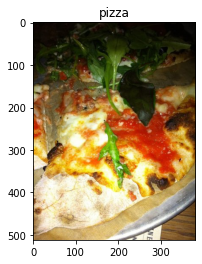

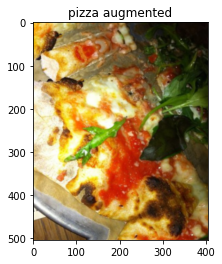

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

target_dir="10_food_classes_1_percent/train"
target_class=random.choice(label_class)
img=random.choice(os.listdir(target_dir+"/"+target_class))
img=mpimg.imread(target_dir+"/"+target_class+"/"+img)
plt.imshow(img)
plt.title(target_class)

plt.figure()

img_aug=data_aug(img/255, training=True)
plt.imshow(img_aug)
plt.title(target_class+" augmented")

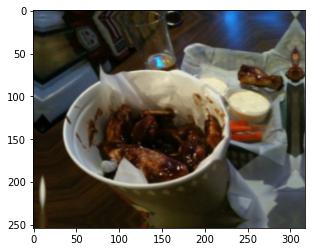

In [20]:
img_aug=data_aug(images[0]/255, training=True)
plt.imshow(img_aug)

In [21]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(300,300,3))
x=data_aug(inputs)
x=base_model(x)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(10, activation="softmax")(x)

model_1=tf.keras.Model(inputs,outputs)

In [22]:
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

history_1=model_1.fit(train_data_1p,
            batch_size=32,
            epochs=5,
            validation_data=(test_data_1p),
            callbacks=[tensorboard_callback("fine_tuning","model_1")],
            validation_steps=int(.25*len(test_data_1p)),
            )

saving Tensorboard files to: fine_tuning/model_1
Epoch 1/5


3/3 [==============================] - ETA: 0s - loss: 2.3014 - accuracy: 0.1571

3/3 [==============================] - 15s 4s/step - loss: 2.3014 - accuracy: 0.1571 - val_loss: 2.1898 - val_accuracy: 0.2286
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.0661 - accuracy: 0.2857 - val_loss: 2.0681 - val_accuracy: 0.3076
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.8862 - accuracy: 0.4143 - val_loss: 1.9577 - val_accuracy: 0.3980
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.6882 - accuracy: 0.6000 - val_loss: 1.8552 - val_accuracy: 0.4359
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.5548 - accuracy: 0.7571 - val_loss: 1.7462 - val_accuracy: 0.5214


In [23]:
b=["Model_1","1% train data+data aug"]
b.append(model_1.evaluate(test_data_1p))

79/79 [==============================] - 10s 116ms/step - loss: 1.7450 - accuracy: 0.5168


#**Model_2**-10%train data+data aug

In [24]:
base_model=tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs=tf.keras.layers.Input(shape=(300,300,3))
x=data_aug(inputs)
x=base_model(x, training=False)
x=tf.keras.layers.GlobalAveragePooling2D()(x)
outputs=tf.keras.layers.Dense(10, activation="softmax")(x)

model_2=tf.keras.Model(inputs, outputs)

In [25]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

history_2=model_2.fit(train_data_10p,
                      batch_size=32,
                      epochs=5,
                      validation_data=(test_data_10p),
                      validation_steps=int(.25*len(test_data_10p)),
                      callbacks=[checkpoint_callback("model_2_after5epochs"),tensorboard_callback("fine_tuning","model_2")],
                      )

saving Tensorboard files to: fine_tuning/model_2
Epoch 1/5


24/24 [==============================] - ETA: 0s - loss: 1.9529 - accuracy: 0.3787

24/24 [==============================] - 63s 2s/step - loss: 1.9529 - accuracy: 0.3787 - val_loss: 1.3684 - val_accuracy: 0.7237
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2531 - accuracy: 0.7080

24/24 [==============================] - 54s 2s/step - loss: 1.2531 - accuracy: 0.7080 - val_loss: 0.9608 - val_accuracy: 0.7977
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9670 - accuracy: 0.7747

24/24 [==============================] - 56s 2s/step - loss: 0.9670 - accuracy: 0.7747 - val_loss: 0.7829 - val_accuracy: 0.8240
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8060 - accuracy: 0.8027

24/24 [==============================] - 54s 2s/step - loss: 0.8060 - accuracy: 0.8027 - val_loss: 0.6851 - val_accuracy: 0.8273
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.7087 - accuracy: 0.8240

24/24 [==============================] - 55s 2s/step - loss: 0.7087 - accuracy: 0.8240 - val_loss: 0.6203 - val_accuracy: 0.8421


**checking if the saved weights and model weights are sam or not**

In [26]:
print(model_2.evaluate(test_data_10p))

79/79 [==============================] - 10s 116ms/step - loss: 0.5916 - accuracy: 0.8536
[0.5915945768356323, 0.853600025177002]


In [27]:
model_2.load_weights("checkpoint_callback/models/model_2_after5epochs") #the weights of model_2 r now overwritten with stored weights
print(model_2.evaluate(test_data_10p))

79/79 [==============================] - 10s 116ms/step - loss: 0.5916 - accuracy: 0.8536
[0.5915947556495667, 0.853600025177002]


In [28]:
c=["Model_2","10% train data+data aug"]
c.append(model_2.evaluate(test_data_10p))

79/79 [==============================] - 10s 116ms/step - loss: 0.5916 - accuracy: 0.8536


#**Model_3**-10%train data+data aug+fine tuning

In [29]:
print(model_2)
(model_2.layers)

In [30]:
for layer in model_2.layers:
  print(layer.trainable)

True
True
False
True
True


In [31]:
for  layer_number, layer in enumerate(base_model.layers):
  print( layer_number, layer.name, layer.trainable)

0 input_5 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [32]:
base_model.trainable=True
for layer in base_model.layers[:-10]:
  layer.trainable=False

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

In [33]:
for layer_no, layer in enumerate(base_model.layers):
  print(layer_no, layer.name, layer.trainable)

0 input_5 False
1 rescaling_2 False
2 normalization_2 False
3 tf.math.truediv_2 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [34]:
history_3=model_2.fit(train_data_10p,
                      epochs=10, #means modle_2 will be trained for 5 more epochs(starting from epoch=5)
                      batch_size=32,
                      initial_epoch=history_2.epoch[-1], #to start from where it left off
                      validation_data=(test_data_10p),
                      validation_steps=int(.25*len(test_data_10p)),
                      callbacks=[tensorboard_callback("fine_tuning","model_3")]
                      )

saving Tensorboard files to: fine_tuning/model_3
Epoch 5/10


24/24 [==============================] - ETA: 0s - loss: 0.6686 - accuracy: 0.7893

24/24 [==============================] - 25s 724ms/step - loss: 0.6686 - accuracy: 0.7893 - val_loss: 0.4045 - val_accuracy: 0.8520
Epoch 6/10
24/24 [==============================] - 18s 717ms/step - loss: 0.2957 - accuracy: 0.9173 - val_loss: 0.4016 - val_accuracy: 0.8586
Epoch 7/10
24/24 [==============================] - 18s 718ms/step - loss: 0.1549 - accuracy: 0.9640 - val_loss: 0.4041 - val_accuracy: 0.8684
Epoch 8/10
24/24 [==============================] - 17s 699ms/step - loss: 0.1377 - accuracy: 0.9627 - val_loss: 0.3744 - val_accuracy: 0.8750
Epoch 9/10
24/24 [==============================] - 17s 684ms/step - loss: 0.1095 - accuracy: 0.9680 - val_loss: 0.4212 - val_accuracy: 0.8536
Epoch 10/10
24/24 [==============================] - 17s 681ms/step - loss: 0.0915 - accuracy: 0.9720 - val_loss: 0.3577 - val_accuracy: 0.8849


In [35]:
d=["Model_3","10% train data+data aug+fine tuning"]
d.append(model_2.evaluate(test_data_10p))

79/79 [==============================] - 10s 117ms/step - loss: 0.3833 - accuracy: 0.8808


#**Model_exp_1**-10%train data+fine tuning

In [36]:
model_0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

In [37]:
history_exp_1=model_0.fit(train_data_10p,
                        epochs=10,
                        batch_size=32,
                        initial_epoch=history_0.epoch[-1],
                        validation_data=(test_data_10p),
                        validation_steps=int(.25*len(test_data_10p)),
                        callbacks=[tensorboard_callback("fine_tuning","exp_model_1")]
                        )

saving Tensorboard files to: fine_tuning/exp_model_1
Epoch 5/10
24/24 [==============================] - 13s 294ms/step - loss: 0.4996 - accuracy: 0.8867 - val_loss: 0.5049 - val_accuracy: 0.8701
Epoch 6/10
24/24 [==============================] - 9s 343ms/step - loss: 0.4208 - accuracy: 0.9040 - val_loss: 0.4791 - val_accuracy: 0.8701
Epoch 7/10
24/24 [==============================] - 6s 238ms/step - loss: 0.3628 - accuracy: 0.9280 - val_loss: 0.4549 - val_accuracy: 0.8849
Epoch 8/10
24/24 [==============================] - 6s 240ms/step - loss: 0.3084 - accuracy: 0.9427 - val_loss: 0.4428 - val_accuracy: 0.8832
Epoch 9/10
24/24 [==============================] - 6s 238ms/step - loss: 0.2846 - accuracy: 0.9440 - val_loss: 0.3852 - val_accuracy: 0.8914
Epoch 10/10
24/24 [==============================] - 6s 238ms/step - loss: 0.2608 - accuracy: 0.9547 - val_loss: 0.4018 - val_accuracy: 0.8799


In [38]:
e=["Model_exp_1","10% train data+fine tuning"]
e.append(model_0.evaluate(test_data_10p))

79/79 [==============================] - 10s 118ms/step - loss: 0.3865 - accuracy: 0.8860


#Model_4-100%train data+fine tuning+data aug

In [39]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
extract("10_food_classes_all_data.zip")

--2022-12-16 05:38:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.5MB/s    in 27s     

2022-12-16 05:39:27 (18.0 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [40]:
train_dir="10_food_classes_all_data/train"
test_dir="10_food_classes_all_data/test"

In [41]:
train_data_100p= tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                     image_size=(300,300),
                                                                     )
test_data_100p=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                   image_size=(300,300),
                                                                   )

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


**we need to first revert back to our feature extract our model 2, since it has already been fint tuned with 10p data**

In [42]:
model_2.load_weights("checkpoint_callback/models/model_2_after5epochs")

In [43]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

history_4=model_2.fit(train_data_100p,
                      batch_size=32,
                      epochs=10,
                      initial_epoch=history_2.epoch[-1],
                      validation_data=(test_data_100p),
                      validation_steps=int(.25*len(test_data_100p)),
                      callbacks=[tensorboard_callback("fine_tuning","model_4")]
                      )

saving Tensorboard files to: fine_tuning/model_4
Epoch 5/10


235/235 [==============================] - ETA: 0s - loss: 0.5496 - accuracy: 0.8261

235/235 [==============================] - 118s 476ms/step - loss: 0.5496 - accuracy: 0.8261 - val_loss: 0.3135 - val_accuracy: 0.8947
Epoch 6/10
235/235 [==============================] - 93s 393ms/step - loss: 0.3591 - accuracy: 0.8864 - val_loss: 0.2883 - val_accuracy: 0.9128
Epoch 7/10
235/235 [==============================] - 95s 401ms/step - loss: 0.2794 - accuracy: 0.9115 - val_loss: 0.1696 - val_accuracy: 0.9507
Epoch 8/10
235/235 [==============================] - 86s 364ms/step - loss: 0.2229 - accuracy: 0.9283 - val_loss: 0.2714 - val_accuracy: 0.9161
Epoch 9/10
235/235 [==============================] - 83s 350ms/step - loss: 0.1939 - accuracy: 0.9323 - val_loss: 0.2367 - val_accuracy: 0.9161
Epoch 10/10
235/235 [==============================] - 80s 339ms/step - loss: 0.1545 - accuracy: 0.9468 - val_loss: 0.2144 - val_accuracy: 0.9293


In [44]:
f=["Model_4","100% train data+data aug+fine tuning"]
f.append(model_2.evaluate(test_data_100p))

79/79 [==============================] - 10s 118ms/step - loss: 0.2503 - accuracy: 0.9216


#**Model_exp_2**-100%train data+fine tuning

In [45]:
model_0.load_weights("checkpoint_callback/models/model_0_after5epochs")

In [46]:
model_0.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"],
                )

history_exp_2=model_0.fit(train_data_100p,
                          epochs=10,
                          batch_size=32,
                          initial_epoch=history_0.epoch[-1],
                          validation_data=(test_data_100p),
                          validation_steps=int(.25*len(test_data_100p)),
                          callbacks=[tensorboard_callback("fine_tuning","exp_model_2")],
                          )

saving Tensorboard files to: fine_tuning/exp_model_2
Epoch 5/10
235/235 [==============================] - 38s 138ms/step - loss: 0.5221 - accuracy: 0.8465 - val_loss: 0.3342 - val_accuracy: 0.9046
Epoch 6/10
235/235 [==============================] - 34s 141ms/step - loss: 0.3943 - accuracy: 0.8821 - val_loss: 0.2761 - val_accuracy: 0.9161
Epoch 7/10
235/235 [==============================] - 32s 134ms/step - loss: 0.3447 - accuracy: 0.8964 - val_loss: 0.2803 - val_accuracy: 0.9161
Epoch 8/10
235/235 [==============================] - 31s 132ms/step - loss: 0.3106 - accuracy: 0.9055 - val_loss: 0.2521 - val_accuracy: 0.9194
Epoch 9/10
235/235 [==============================] - 31s 131ms/step - loss: 0.2850 - accuracy: 0.9143 - val_loss: 0.2569 - val_accuracy: 0.9194
Epoch 10/10
235/235 [==============================] - 34s 142ms/step - loss: 0.2657 - accuracy: 0.9184 - val_loss: 0.2255 - val_accuracy: 0.9243


In [47]:
g=["Model_exp_2","100% train data+fine tuning"]
g.append(model_0.evaluate(test_data_100p))

79/79 [==============================] - 10s 119ms/step - loss: 0.2298 - accuracy: 0.9288


#**Summary**

In [48]:
import pandas as pd
data=[]
data.append(a)
data.append(b)
data.append(c)
data.append(d)
data.append(e)
data.append(f)
data.append(g)
df=pd.DataFrame(data, columns=["Model No.","Description","Loss_Accuracy"])
df

,Model No.,Description,Loss_Accuracy
0,Model_0,10% train_data,"[0.5482178330421448, 0.8679999709129333]"
1,Model_1,1% train data+data aug,"[1.7450025081634521, 0.5167999863624573]"
2,Model_2,10% train data+data aug,"[0.5915946364402771, 0.853600025177002]"
3,Model_3,10% train data+data aug+fine tuning,"[0.38333839178085327, 0.8808000087738037]"
4,Model_exp_1,10% train data+fine tuning,"[0.3865422308444977, 0.8859999775886536]"
5,Model_4,100% train data+data aug+fine tuning,"[0.2503405809402466, 0.9215999841690063]"
6,Model_exp_2,100% train data+fine tuning,"[0.2297656238079071, 0.9287999868392944]"


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [49]:
!tensorboard dev upload --logdir ./fine_tuning/\
--name "Experiments with fine tuning"\
--one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./fine_tuning/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=qqLMZLMsolkA1IsWcowdnhUl4OWA5E&prompt=consent&access_type=offlin

#**TensorBoard reults** :

https://tensorboard.dev/experiment/Fvkyyg3VSey66hvvhv2zgg/